In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv', encoding='ISO-8859-1')

In [8]:
dataset.shape

(5572, 5)

In [9]:
print(dataset["v1"].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [11]:
import matplotlib.pyplot as plt

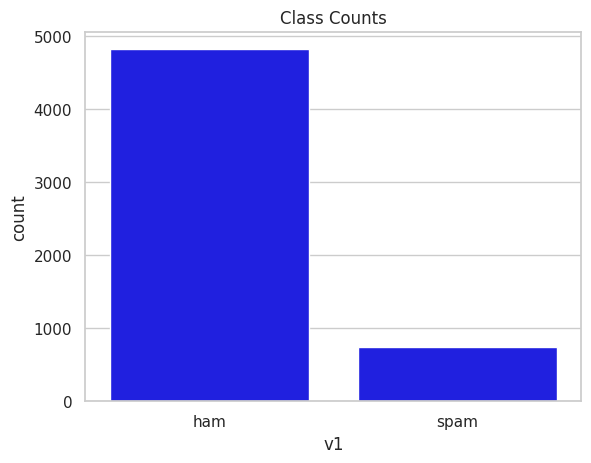

In [12]:
dataset["v1"] = dataset["v1"].astype("category")
sns.countplot(data=dataset, x="v1", color="blue")
plt.title("Class Counts")
plt.show()

#**Pre-Processing**

In [13]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

In [14]:
stemmer=nltk.SnowballStemmer('english')
STOPWORDS=stopwords.words('english')
PUNCT_TO_REMOVE = string.punctuation

In [15]:
def clean_text(v2):

    Text = word_tokenize(v2)                                                     # tokenize
    Text = str(v2).lower()                                                       # converting to lower case
    Text = re.sub(r"[^a-zA-Z\s]", "", v2)                                        # removing digit
    Text = re.sub(r'@\S+|http\S+|www.\S+|\n','',v2)                              # removing mentions and links
    #Text = re.sub(r'[^A-Za-z0-9\s]+', '', v2)                                    # removing special characters
    Text = [stemmer.stem(word) for word in v2.split(' ')]                        # stem words(base form)
    Text = " ".join([word for word in v2 if word not in STOPWORDS])              # remove stopwords
    Text = v2.strip()                                                            # remove extra spaces from start and end of string
    Text = v2.translate(str.maketrans('', '', PUNCT_TO_REMOVE))                  # remove puncuation

    return v2

In [16]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
dataset['v2'] = dataset['v2'].astype(str)
dataset['clean_data'] = dataset['v2'].apply(clean_text)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
number = LabelEncoder()
dataset['v1'] = number.fit_transform(dataset['v1'])

dataset['v1']

,v1
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [20]:
for class_name, encoded_value in zip(number.classes_, number.transform(number.classes_)):
    print(f"{class_name}: {encoded_value}")

ham: 0
spam: 1


In [21]:
class_names = number.inverse_transform(dataset['v1'].unique())

# Print class level names with their corresponding labels
for label, class_name in enumerate(class_names):
    print(f"Label {label}: {class_name}")

Label 0: ham
Label 1: spam


#**TF-IDF**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display

In [23]:
tfidf1 = TfidfVectorizer(ngram_range=(1,1),use_idf=True)
X = tfidf1.fit_transform(dataset['clean_data'])
y=dataset['v1']
print("Shape of TF-IDF:",X.shape,'\n')

Shape of TF-IDF: (5572, 8672) 



In [24]:
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf1.get_feature_names_out())
display(tfidf_df)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state =42)

print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (4457, 8672)
Shape of X_test: (1115, 8672)
Shape of Y_train: (4457,)
Shape of Y_test: (1115,)


## **Model : NB**

**1.Accuracy**

**2.Classification report**

**3.Precision, Recall, F1 score**

**4.Confusion Matrix**

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [27]:
alpha_value=0.1
model_NB = MultinomialNB(alpha=alpha_value)

model_NB.fit(xtrain, ytrain)
predicted_NB = model_NB.predict(xtest)
n=accuracy_score(ytest,predicted_NB)

In [28]:
n = '{:.3f}'.format(n)
print("Accuracy of NB:", n)

Accuracy of NB: 0.982


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [30]:
print(classification_report(ytest, predicted_NB))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [31]:
precision = precision_score(ytest, predicted_NB, average='macro')
recall = recall_score(ytest, predicted_NB, average='macro')
f1 = f1_score(ytest, predicted_NB, average='macro')

a2 = '{:.4f}'.format(precision)
b2 = '{:.4f}'.format(recall)
c2 = '{:.4f}'.format(f1)

print("Precision:", a2)
print("Recall:", b2)
print("F1-score:", c2)

Precision: 0.9745
Recall: 0.9474
F1-score: 0.9604


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

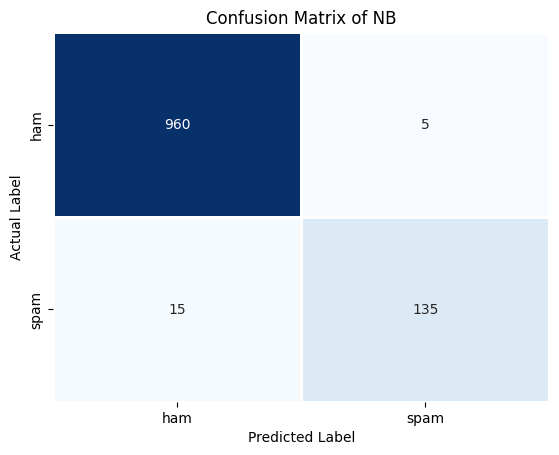

In [51]:
cm2 = confusion_matrix(ytest, predicted_NB)
sns.heatmap(cm2, linewidths=1, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='g', cbar=False, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of NB')
plt.show()

## **Model : SVM**

**1.Accuracy**

**2.Classification report**

**3.Precision, Recall, F1 score**

**4.Confusion Matrix**

In [33]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
model_SVM=SVC(probability=True)
model_SVM.fit(xtrain,ytrain)

SVC(probability=True)

In [35]:
predicted_SVM = model_SVM.predict(xtest)

In [36]:
s=accuracy_score(ytest,predicted_SVM)
s = '{:.3f}'.format(s)
print("Accuracy of SVM:", s)

Accuracy of SVM: 0.977


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_SVM))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
precision = precision_score(ytest, predicted_SVM, average='macro')
recall = recall_score(ytest, predicted_SVM, average='macro')
f1 = f1_score(ytest, predicted_SVM, average='macro')

a1 = '{:.4f}'.format(precision)
b1 = '{:.4f}'.format(recall)
c1 = '{:.4f}'.format(f1)

print("Precision:", a1)
print("Recall:", b1)
print("F1-score:", c1)

Precision: 0.9869
Recall: 0.9133
F1-score: 0.9459


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
class_names = number.inverse_transform(dataset['v1'].unique())

# Print class level names with their corresponding labels
for label, class_name in enumerate(class_names):
    print(f"Label {label}: {class_name}")

Label 0: ham
Label 1: spam


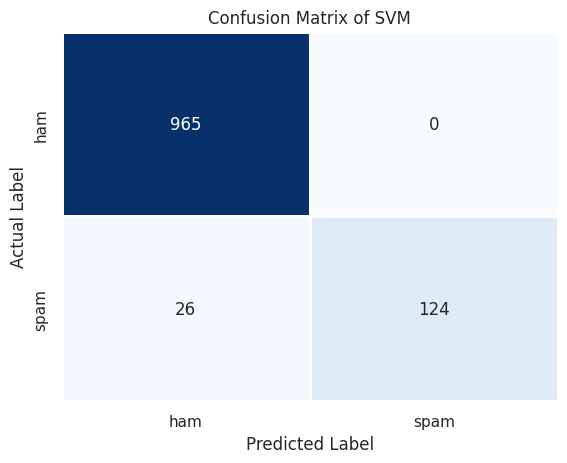

In [42]:
cm1 = confusion_matrix(ytest, predicted_SVM)
sns.heatmap(cm1, linewidths=1, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='g', cbar=False, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of SVM')
plt.show()

## **Model : LR**

**1.Accuracy**

**2.Classification report**

**3.Precision, Recall, F1 score**

**4.Confusion Matrix**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model_LR=LogisticRegression(C=5.0, max_iter=1000)
model_LR.fit(xtrain,ytrain)

predicted_LR = model_LR.predict(xtest)
LR=accuracy_score(ytest,predicted_LR)

In [45]:
lr = '{:.3f}'.format(LR)
print("Accuracy of LR:", lr)

Accuracy of LR: 0.976


In [46]:
print(classification_report(ytest, predicted_LR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [47]:
precision = precision_score(ytest, predicted_LR, average='macro')
recall = recall_score(ytest, predicted_LR, average='macro')
f1 = f1_score(ytest, predicted_LR, average='macro')

a7 = '{:.4f}'.format(precision)
b7 = '{:.4f}'.format(recall)
c7 = '{:.4f}'.format(f1)

print("Precision:", a7)
print("Recall:", b7)
print("F1-score:", c7)

Precision: 0.9829
Recall: 0.9128
F1-score: 0.9440


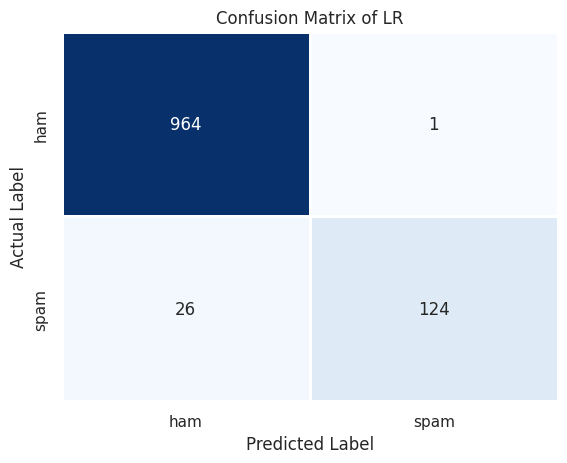

In [48]:
cm7 = confusion_matrix(ytest, predicted_LR)
sns.heatmap(cm7, linewidths=1, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='g', cbar=False, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of LR')
plt.show()

In [49]:
SVM = [s, a1, b1, c1]
NB  = [n, a2, b2, c2]
LR  = [lr, a7, b7, c7]

In [50]:
# Create a DataFrame object
df = pd.DataFrame([SVM, NB,LR],
                  columns=['Accuracy', 'Precision Score', 'Recall Score', 'F1 Score'],
                  index=['SVM', 'Naive Bayes','Logistic Regression'])

In [51]:
df

,Accuracy,Precision Score,Recall Score,F1 Score
SVM,0.977,0.9869,0.9133,0.9459
Naive Bayes,0.982,0.9745,0.9474,0.9604
Logistic Regression,0.976,0.9829,0.9128,0.9440


#**Output Test**

In [52]:
while True:
    review = input("Enter your review (or 'exit' to quit): ")

    if review.lower() == 'exit':
        break

    print("Original Review:", review)

    cl_review = clean_text(review)
    print("Processed Review:", cl_review)

    vector = tfidf1.transform([cl_review]).toarray()
    result = model_NB.predict(vector)

    if result == 0:
        print("Ham mail")
    elif result == 1:
        print("Spam mail")


    print()

Enter your review (or 'exit' to quit): England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
Original Review: England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
Processed Review: England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
Spam mail

Enter your review (or 'exit' to quit): exit
